In [1]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import numpy as np

## Preprocessing Definitions

In [2]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    text = re.sub('_',' ',text)
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
corpus = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

In [5]:
sample = denoise_text(corpus.data[17655])

In [6]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [7]:
def remove_emails(text):
    return re.sub('\S*@\S*\s?', '', text)

In [8]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [9]:
sample = replace_contractions(sample)
sample = remove_emails(sample)
sample = remove_numbers(sample)

In [10]:
print(sample)





Not boring is right!!! It is more likely to because me to have a stroke!!
I had to listen to game two on the Blackhawk station and I do not think I
could take another call of "And JOSEPH makes a SPEcTACular saaaaaave".
Now I am a Blues fan, but I do not want them to play "like" they played
in game two. Sure the result was fine, but the Blues match up very well
with the Hawks so they really do not need to treat them like the  Flames.
We do not need a "Monday Night Miracle" to have a chance to beat Chicago.
The Blues can do it on talent. At least over the hawks.

Rich h.--- Go BLUES!!


In [11]:
words = nltk.word_tokenize(sample)

In [12]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# def replace_numbers(words):
#     """Replace all interger occurrences in list of tokenized words with textual representation"""
#     p = inflect.engine()
#     new_words = []
#     for word in words:
#         if word.isdigit():
#             new_word = p.number_to_words(word)
#             new_words.append(new_word)
#         else:
#             new_words.append(word)
#     return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    words = [word for word in words if len(word)>2]
    return words

In [13]:
nltk.download('stopwords')
words = normalize(words)

print(words)

['boring', 'right', 'likely', 'stroke', 'listen', 'game', 'two', 'blackhawk', 'station', 'think', 'could', 'take', 'another', 'call', 'joseph', 'makes', 'spectacular', 'saaaaaave', 'blues', 'fan', 'want', 'play', 'like', 'played', 'game', 'two', 'sure', 'result', 'fine', 'blues', 'match', 'well', 'hawks', 'really', 'need', 'treat', 'like', 'flames', 'need', 'monday', 'night', 'miracle', 'chance', 'beat', 'chicago', 'blues', 'talent', 'least', 'hawks', 'rich', 'blues']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lpott\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    #lemmas = lemmatize_verbs(words)
    return stems

stems = stem_and_lemmatize(words)

#print('Stemmed:\n', stems)
print('\Stemmed:\n', stems)

\Stemmed:
 ['bor', 'right', 'lik', 'stroke', 'list', 'gam', 'two', 'blackhawk', 'stat', 'think', 'could', 'tak', 'anoth', 'cal', 'joseph', 'mak', 'spectacul', 'saaaaaav', 'blu', 'fan', 'want', 'play', 'lik', 'play', 'gam', 'two', 'sur', 'result', 'fin', 'blu', 'match', 'wel', 'hawk', 'real', 'nee', 'tre', 'lik', 'flam', 'nee', 'monday', 'night', 'mirac', 'chant', 'beat', 'chicago', 'blu', 'tal', 'least', 'hawk', 'rich', 'blu']


In [15]:
def preprocessor(doc):
    return stem_and_lemmatize(normalize(nltk.word_tokenize(remove_numbers(remove_emails(replace_contractions(denoise_text(doc)))))))

## Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(tokenizer=preprocessor,min_df=5)

In [17]:
countvecs = counter.fit_transform(corpus.data)

C:\Users\lpott\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\lpott\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [83]:
print(corpus.data[20])

: 
: I am considering buying a 1993 Chevy or GMC 4x4 full-size pickup with
: the extended cab.  Any opinions about these vehicles?  Have there been
: any significant problems?
: 
: -- 
: Dick Grady           Salem, NH,  USA            grady@world.std.com
: So many newsgroups, so little time!


I bought a brand new 1992 Chevrolet K2500 HD 4x4 extended cab last
May.  It has had many, many problems.  See my earler post that describes
the situation.  I went to BBB arbitration, and they ruled that Chevrolet
must buy it back from me.  If you do get one, stay away from the 5 speed
manual with the deep low first gear.  They have put three of them in my
truck so far.  After about 1,500 miles, overdrive either starts
rattling or hissing loudly.  There is no way to fix them.  Chevrolet 
says that the noise is "a characteristic of the transmission."

Also, if you are planning to use your truck to tow, the
gear ratios in that tranny suck.  On a steep hill, you get up to about
55 MPH in second gear 

In [82]:
counter.inverse_transform(countvecs[20,:])

[array(['also', 'anoth', 'arbit', 'arm', 'attempt', 'autom', 'away',
        'back', 'bad', 'begin', 'bet', 'both', 'bought', 'brand', 'buy',
        'cab', 'car', 'charact', 'chevrolet', 'chevy', 'comp', 'company',
        'compress', 'consid', 'control', 'cov', 'deal', 'deep', 'describ',
        'dick', 'drop', 'duty', 'earl', 'eith', 'embed', 'engin', 'exceiv',
        'extend', 'fan', 'far', 'fel', 'first', 'fix', 'ford', 'fulls',
        'gear', 'get', 'gmc', 'gon', 'grady', 'hil', 'hiss', 'includ',
        'individ', 'last', 'light', 'lin', 'link', 'littl', 'longev',
        'loos', 'loud', 'low', 'mad', 'mak', 'man', 'many', 'may', 'mil',
        'mot', 'mph', 'must', 'nev', 'new', 'newsgroup', 'nois', 'on',
        'opin', 'overdr', 'paint', 'part', 'pickup', 'plan', 'point',
        'post', 'problem', 'pul', 'put', 'rail', 'ratio', 'rattl', 'react',
        'real', 'reason', 'rpm', 'rul', 'rust', 'salem', 'say', 'second',
        'see', 'shift', 'ship', 'sign', 'situ', 'spec',

In [18]:
counter.get_feature_names()

['aa',
 'aamir',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbot',
 'abbrevy',
 'abc',
 'abd',
 'abdom',
 'abdomin',
 'abduc',
 'abdullah',
 'aber',
 'aberdeen',
 'abh',
 'abhor',
 'abid',
 'abl',
 'abnorm',
 'aboard',
 'abod',
 'abol',
 'abolit',
 'abomin',
 'abort',
 'abound',
 'abov',
 'abraham',
 'abram',
 'abridg',
 'abroad',
 'abrog',
 'abrupt',
 'abs',
 'absens',
 'absolv',
 'absorb',
 'abstact',
 'abstain',
 'abstin',
 'abstract',
 'absurd',
 'abu',
 'abud',
 'abund',
 'abus',
 'abyss',
 'ac',
 'acad',
 'academ',
 'academy',
 'acc',
 'acceiv',
 'accel',
 'acces',
 'access',
 'accessvisamastercard',
 'accid',
 'acclim',
 'accommod',
 'accomod',
 'accompany',
 'accompl',
 'accord',
 'account',
 'accredit',
 'accret',
 'accross',
 'accum',
 'accus',
 'accuss',
 'accustom',
 'acdc',
 'acegr',
 'ach',
 'acheiv',
 'achiev',
 'acid',
 'acidophil',
 'ack',
 'acknowledg',
 'aclu',
 'acm',
 'acn',
 'acorn',
 'acoust',
 'acquaint',
 'acquir',
 'acquisit',
 'acquit',
 'acr',
 'acronym',
 'a

## TF-IDF Transformations

In [21]:
# TfidfVectorizer :)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=preprocessor,min_df=5)

In [ ]:
X = vectorizer.fit_transform(corpus.data)

In [41]:
len(vectorizer.get_feature_names())

12419

In [70]:
import matplotlib.pyplot as plt

(array([  11.,   56.,  183.,  359.,  511.,  743., 1000., 1546., 2336.,
        5674.]),
 array([2.09834703, 2.79374728, 3.48914754, 4.18454779, 4.87994804,
        5.57534829, 6.27074855, 6.9661488 , 7.66154905, 8.35694931,
        9.05234956]),
 <a list of 10 Patch objects>)

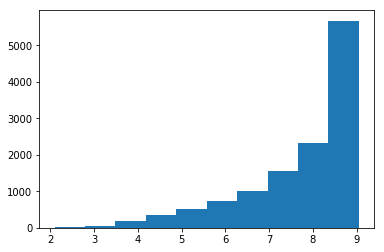

In [71]:
plt.hist(vectorizer.idf_)

In [34]:
idx_best = np.argsort(vectorizer.idf_)[::-1]

In [65]:
tf_idfs_vocabulary = vectorizer.get_feature_names()
top_features = [tf_idfs_vocabulary[i] for i in idx_best[:top_n]]
filtered_features = [tf_idfs_vocabulary[i] for i,idf_score in enumerate(vectorizer.idf_ > 7.5) if idf_score]

In [100]:
len(filtered_features)

8419

In [23]:
for i,t in enumerate(corpus.data):
    if "abcdefg" in t:
        print(i)

5151


## Save Model and Load Model

In [85]:
import pickle

### Save the tf_idf model

In [86]:
# save model to the disk
filename = 'tf_idf.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

### Load the tf_idf model

In [99]:
# load the model from disk
vectorizer = pickle.load(open(filename, 'rb'))

### Save the BoW model

In [97]:
# save model to the disk
filename = 'BoW.sav'
pickle.dump(counter, open(filename, 'wb'))

### Load the BoW model

In [ ]:
# load the model from disk
counter = pickle.load(open(filename, 'rb'))